In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import os
from collections import defaultdict
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('classic')
plt.rcParams.update({'font.size':22})
import os.path, time
import math

In [3]:
#Off Policy Discrete Puddle World
major_dir = "../../Results_Puddle_AC_Dec" # Add directory name where results are stored
datep="11-01" # Mention the date for which you want to plot
path = os.path.join(major_dir, "PuddleSACOffP_"+datep) # Change the directory structure of reading according to your saving structure
save_folder = os.path.join(major_dir,"Plots_"+datep)
if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
dirs = os.listdir(path)
file_names_to_read_i = []
for dir_name in dirs:
    if (dir_name.startswith("R") and "E2000" in dir_name):
        if ("_thread" in dir_name):
            continue
        files = os.listdir(os.path.join(path, dir_name))
        if "History.npy" in files:
            file_names_to_read_i.append(dir_name)        
            
final_rewards =[]

psis=["0.0","0.125"]
episode =2000
file_names_to_read= []
name_to_index= {}
cur_index_dict = 0
final_nanes =[]
for i in range(len(psis)):    
    for fi in file_names_to_read_i:  
        if "Psi"+str(psis[i])+"_" in fi:
            name_elements = fi.split("_seed")
            start_name = name_elements[0].split("_Psi")[1]
            start_name = "Psi"+start_name
            if start_name not in file_names_to_read:
                name_to_index[start_name] = cur_index_dict                
                file_names_to_read.append(start_name)
                cur_index_dict+=1
                
for i in range(len(file_names_to_read)):
    flag = 0
    curr_return = []
    for fi in file_names_to_read_i:    
        name_elements = fi.split("_seed")
        start_name = name_elements[0].split("_Psi")[1]
        start_name = "Psi"+start_name
        if start_name in file_names_to_read[i]:
            filename_reward = os.path.join(path,fi, "History.npy")
            data = np.load(filename_reward)
            curr_return.extend(data[:,:episode,0])
            
    return_tar = np.array(curr_return)    
    averaged_reward = np.mean(return_tar, axis = 0)
    variance_reward = np.std(return_tar, axis = 0)
    print ("filename: ", file_names_to_read[i], "at i: ",i, "Reward shape: ", return_tar.shape)
    
    data_reward = np.vstack((averaged_reward, variance_reward))
    final_rewards.append(data_reward)    

filename:  Psi0.0_LRC0.05_LRTheta0.0005_LRV0.001_temp0.75 at i:  0 Reward shape:  (50, 2000)
filename:  Psi0.125_LRC0.1_LRTheta0.0001_LRV0.0005_temp0.75 at i:  1 Reward shape:  (50, 2000)


Psi0.0_LRC0.05_LRTheta0.0005_LRV0.001_temp0.75
Mean score:  43.7746256652
Mean var:  20.0792613715
0
Psi0.125_LRC0.1_LRTheta0.0001_LRV0.0005_temp0.75
Mean score:  46.9012986089
Mean var:  4.951393358
1


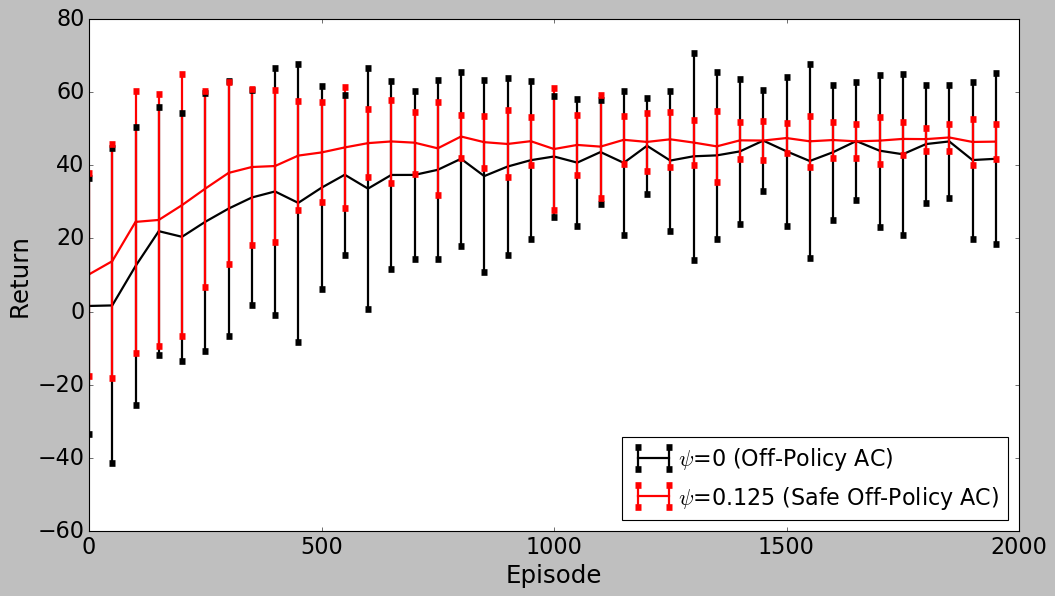

In [4]:
"""
Return Plot
"""
start = 0.0
stop = 1.0
number_of_lines= len(file_names_to_read)
cm_subsection = np.linspace(start, stop, number_of_lines)
colors = [ cm.Dark2(x) for x in cm_subsection ]
colors=['k','r', 'g', 'c', 'm','y','orange']

labels_write=["0 (Off-Policy AC)","0.125 (Safe Off-Policy AC)"]
color_count = 0

start_from= 0
end_to = 2000
k_steps = 1 #Adjust ksteps accordingly here
window = 50
fig, ax = plt.subplots(figsize=(15, 8))
color_count = 0
for k in range(len(file_names_to_read)):
    reward = final_rewards[k][0][start_from:end_to]
    reward_std = final_rewards[k][1][start_from:end_to]
    mean_score = np.mean(reward[-500:])
    mean_var = np.mean(reward_std[-500:])
    length = int(reward.shape[0]/ window)
    new_reward = np.zeros(length)
    new_reward_std = np.zeros(length)
    x_axis = []
    for i in range(0,length):
        new_reward[i] = np.mean(reward[i*window : i*window + window])
        new_reward_std[i] = np.mean(reward_std[i*window : i*window + window])
        x_axis.append(start_from+i*k_steps*window)

    mean_std_dev = np.mean(new_reward_std)
    error =new_reward_std
    name = file_names_to_read[k]
    linestyle="-"
    print(file_names_to_read[k])
    print("Mean score: ", mean_score)
    print("Mean var: ", mean_var)
    print(k)

    plt.errorbar(x_axis, new_reward, new_reward_std, label = "$\psi$="+labels_write[color_count],barsabove=True, linewidth = 2,capthick = 6, color = colors[color_count] )
    color_count +=1

plt.xlabel("Episode", fontsize=22)
plt.ylabel("Return",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20}, loc='best', handletextpad=0.1)

plt.savefig((os.path.join(save_folder,"OffPol_Puddle_Result"+".png")), dpi=200, facecolor='w', edgecolor='w',
           orientation='portrait', papertype=None, format=None,
           transparent=True, bbox_inches='tight', pad_inches=0,
           frameon=None)
plt.show()
plt.close()

In [5]:
layout = """\
wwwwwwwwwwww
w          w
w          w
w          w
w   ffff   w
w   ffff   w
w   ffff   w
w   ffff   w
w          w
w          w
w          w
wwwwwwwwwwww
"""


In [7]:
#Plot Puddle in Discrete World
import gym
from PuddleDiscrete import PuddleD
import os
import matplotlib.pyplot as plt
import seaborn as sn

class Tabular:
    def __init__(self, nstates):
        self.nstates = nstates

    def __call__(self, state):
        return np.array([state, ])

    def __len__(self):
        return self.nstates
    
   
r_folder = "../../Results_Puddle_AC_Dec/PuddleSACOffP_11-01"
names =["R50_E2000_Psi0.0_LRC0.05_LRTheta0.0005_LRV0.001_temp0.75_seed10_Policy_S",
        "R50_E2000_Psi0.125_LRC0.1_LRTheta0.0001_LRV0.0005_temp0.75_seed10_Policy_S"]
index=0
env = gym.make('Puddle-v1')
num_states = env.observation_space.n
features = Tabular(num_states)
nactions = env.action_space.n

weight_policy_total = np.load(os.path.join(r_folder, names[index],"Weights_Policy.npy"))
    

In [8]:
def getEnvLayout(layout,ann_format_char = True):
    num_elem = 12
    line_count = 0
    mat_layout = -2*np.ones((num_elem, num_elem))
    mapping_state_row_col = defaultdict(list)
    ann_layout_char = np.chararray((num_elem, num_elem), unicode=True)
    ann_layout_num = np.zeros((num_elem, num_elem))        
    
    state_count = 0
    for line in layout.splitlines():
        for i in range(num_elem):
            if line[i]!="w":
                mapping_state_row_col[state_count].extend([line_count, i])
                ann_layout_num[line_count, i] = state_count
                state_count +=1            
            if line[i] == "f":
                mat_layout[line_count, i] = 10
                ann_layout_char[line_count, i]='F'
            elif line[i]=="w":
#                 mat_layout[line_count, i] = 55 #Freq
                mat_layout[line_count, i] = 5 #Policy
        line_count +=1
    if ann_format_char==True:
        ann_layout = ann_layout_char
    else:
        ann_layout = ann_layout_num
    return mat_layout, ann_layout, mapping_state_row_col

In [9]:
def GetFrozenStates():
    num_elem = 12
    line_count = 0
    element_count = 0
    frozen_states =[]
    state_num=0
    for line in layout.splitlines():
        for i in range(num_elem):        
            if line[i] == "f":
                frozen_states.append(state_num)
            if line[i]!="w":
                state_num +=1
    return frozen_states

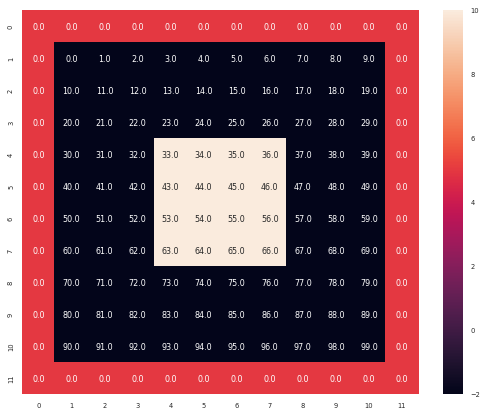

In [12]:
#Plot discrete Puddle

plt.figsize=(1,1)
mat_layout,ann_layout, mapping_state_row_col = getEnvLayout(layout, False)
sn.set(font_scale=0.6)
ax = sn.heatmap(mat_layout, annot = ann_layout, fmt = '')
plt.show()
plt.close()

init state:  76


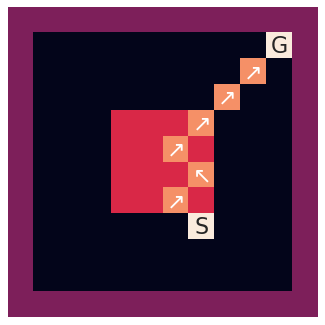

init state:  29


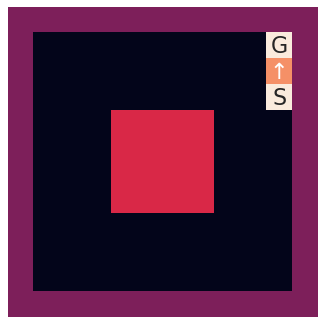

In [13]:
init_state_done =[]
count_graph_plot = 0
run_to_show = 0 # run number of experiment
episode =-1
folder = os.path.join(r_folder,"traj")
if not os.path.exists(folder):
        os.makedirs(folder)

folder = os.path.join(folder,"Psi0.125")
if not os.path.exists(folder):
    os.makedirs(folder)
        
num_elem = 12
possible_goal_states = [9]
max_time_step = 50
# 0:U
# 1:D
# 2:L
# 3:R
# 4:UR
# 5:DR
# 6:DL
# 7:UL
action_mapping = [u'↑',u'↓', u'←',u'→',u'↗',u'↘',u'↙',u'↖']

start_states =[]
num_traj =2
count_traj = 0
while(count_traj<num_traj):    
    curr_time = 0
    init_state = env.reset()
    if init_state in init_state_done:
        continue
    else:
        count_traj +=1
        ann_action = np.chararray((num_elem, num_elem), unicode=True)
        init_state_done.append(init_state)
        

    print("init state: ", init_state)
    curr_state = init_state
    cmap = sn.dark_palette("seagreen",n_colors=4, as_cmap=True)

    goal_state = 9
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout)
    while(curr_state!= goal_state and max_time_step > curr_time): 
        action = np.argmax(weight_policy_total[run_to_show,episode,curr_state, :])
        next_state,r,d,_ = env.step(action)
        row, col = mapping_state_row_col[curr_state]
        row_2, col_2 = mapping_state_row_col[next_state]
        mat_layout[row, col] = 15
        if curr_state == init_state:
            ann_action[row,col] = 'S'
            mat_layout[row,col] = 20
        else:
            ann_action[row, col] =action_mapping[action]
        curr_state = next_state
        curr_time +=1

    if curr_state == possible_goal_states[0]:
        r,c = mapping_state_row_col[curr_state]
        mat_layout[r,c] = 20
        ann_action[r,c] = 'G'
        
    plt.figure(figsize = (5,5))
    sn.set(font_scale=0.6)
    ax = sn.heatmap(mat_layout, annot = ann_action, fmt = '', cbar=False,annot_kws={"size": 20},square=True)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    init_state_done.append(init_state)
    count_graph_plot +=1
    plt.savefig((os.path.join(folder, "Policy_init"+str(init_state)+"_run"+str(run_to_show)+"_eps"+str(episode)+".png")), dpi=400, facecolor='w', 
    edgecolor='w', orientation='portrait', papertype=None, format=None,
    transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
    plt.show()
    plt.close()

Run:  0


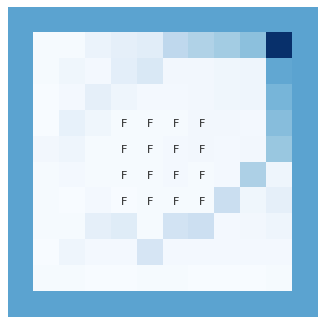

In [44]:
#Freq Plots for Puddle World - Off Policy Discrete

'''
Find trajectories with finalized learning
'''
dir_name = os.path.join(r_folder,"freq")
if not os.path.exists(dir_name):
        os.makedirs(dir_name)

folder = os.path.join(dir_name,"Psi0.125")
if not os.path.exists(folder):
        os.makedirs(folder)

run_to_show = 0 # run number of experiment
episode =-1
        
for run_to_show in range(1):
    num_trajectory = 1000
    count_trajectory = 1
    max_time_step = 50
    
    trajectories = []
    rewards = []
    averaged_reward =[]
    steps =[]
    frozen_states = GetFrozenStates()
    start_states = []

    freq_states = np.zeros(100)
    while(count_trajectory <= num_trajectory):
        start = env.reset()
#         if start in start_states:
#             continue
#         else:
        states_visited=[]
        count_trajectory+=1
        new_trajectory= []
        new_reward = []
        start_states.append(start)
        curr_state = start
        new_trajectory.append(start)
        curr_time = 0
        freq_states[curr_state] +=1
        while(curr_state!= 9 and max_time_step > curr_time):
            action = np.argmax(weight_policy_total[run_to_show,episode,curr_state, :])
            next_state,r,d,_ = env.step(action)
            if curr_state not in states_visited:
                freq_states[next_state] +=1
                states_visited.append(curr_state)

            curr_state = next_state
            curr_time +=1

    normalized_freq = (freq_states-min(freq_states))/(max(freq_states)-min(freq_states))
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout)
    for i in range(100):
        row, col = mapping_state_row_col[i]
        mat_layout[row, col] = np.round(normalized_freq[i],2)*100
    print("Run: ", run_to_show)
    plt.figure(figsize = (5,5))
    ax = sn.heatmap(mat_layout, annot=ann_layout,fmt = '', cmap="Blues", cbar = False,annot_kws={"size":10},square=True)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     plt.savefig((os.path.join(folder,"Freq_run"+str(run_to_show)+"_eps"+str(episode)+".png")), dpi=300, facecolor='w', edgecolor='w',
#                orientation='portrait', papertype=None, format=None,
#                transparent=True, bbox_inches='tight', pad_inches=0,
#                frameon=None)
    plt.show()
    plt.close()

Run: 0


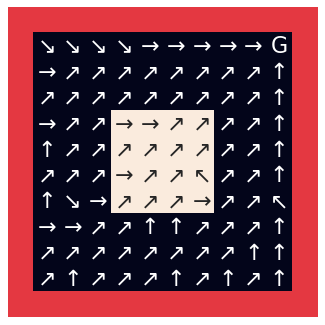

In [29]:
# Converged Policy Puddle Discrete Off Policy

run_to_show = 0 # run number of experiment
episode =-1

folder = os.path.join(r_folder,"ConvergedPolicy")
if not os.path.exists(folder):
        os.makedirs(folder)
folder = os.path.join(folder,"Psi0.0")
if not os.path.exists(folder):
    os.makedirs(folder)
   
for run_to_show in [0]:
    num_elem = 12    
    action_mapping = [u'↑',u'↓', u'←',u'→',u'↗',u'↘',u'↙',u'↖']
    ann_action = np.chararray((num_elem, num_elem), unicode=True)
    mat_layout, ann_layout, mapping_state_row_col = getEnvLayout(layout)

    for state in range(100):
        action = np.argmax(weight_policy_total[run_to_show,episode,state, :])
        r,c = mapping_state_row_col[state]
        ann_action[r,c] = action_mapping[action]
    r,c = mapping_state_row_col[9]
    ann_action[r,c] = 'G'
    r,c = mapping_state_row_col[64]
    ann_action[r,c] = action_mapping[4]
    r,c = mapping_state_row_col[82]
    ann_action[r,c] = action_mapping[4]
    r,c = mapping_state_row_col[76]
    ann_action[r,c] = action_mapping[4]
    r,c = mapping_state_row_col[77]
    ann_action[r,c] = action_mapping[4]
    r,c = mapping_state_row_col[87]
    ann_action[r,c] = action_mapping[4]
    r,c = mapping_state_row_col[44]
    ann_action[r,c] = action_mapping[4]
    
    print("Run:", run_to_show)
    plt.figure(figsize = (5,5))
    sn.set(font_scale=0.6)
    ax = sn.heatmap(mat_layout, annot = ann_action, fmt = '', cbar=False,annot_kws={"size": 20},square=True)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     plt.savefig((os.path.join(folder, "ConvergePolicy_run"+str(run_to_show)+"_eps"+str(episode)+".png")), dpi=400, facecolor='w', 
#     edgecolor='w', orientation='portrait', papertype=None, format=None,
#     transparent=True, bbox_inches='tight', pad_inches=0, frameon=None)
    plt.show()
    plt.close()